In [24]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [25]:
df = pd.read_csv('cleaned_dataset.csv')
df

,Datum,Laufwerke,Speicherwerke,Total Hydraulisch,Kernkraftwerke,Thermisch,Windkraft,Photovoltaik,Total Erneuerbar,Verbrauch Speicherpumpen,Nettoerzeugung Total,Einfuhr,Ausfuhr,Überschuss,Landesverbrauch,Mittlere Tagestemperatur,Wasserführung Rhein,Wasserführung in %
0,2025-01-01,26.2,18.3,44.5,71.0,9.9,1.2,6.2,132.8,26.5,106.3,140.8,74.7,66.1,172.4,1.0,672.0,86.0
1,2025-01-08,37.7,67.6,105.3,70.8,10.7,1.6,2.9,191.2,6.0,185.3,116.9,106.6,10.3,195.6,7.0,1572.0,200.0
2,2025-01-15,40.5,107.2,147.7,71.1,12.3,0.7,7.3,239.2,8.1,231.1,79.6,91.0,-11.4,219.7,-0.0,1061.0,135.0
3,2025-01-22,35.9,95.8,131.7,71.0,12.2,1.2,3.6,219.8,3.6,216.2,74.0,72.2,1.7,217.9,1.0,862.0,110.0
4,2025-01-29,36.5,62.4,98.9,71.0,12.4,0.9,13.5,196.8,10.7,186.0,114.3,102.3,12.0,198.0,6.0,1578.0,201.0
5,2025-02-05,33.7,92.1,125.8,71.1,10.8,0.4,11.5,219.6,5.4,214.1,82.8,83.4,-0.6,213.5,-0.0,922.0,113.0
6,2025-02-12,31.7,85.7,117.4,70.7,10.9,0.4,8.9,208.3,3.8,204.5,79.2,86.8,-7.7,196.9,7.0,834.0,102.0
7,2025-02-19,30.3,76.3,106.6,69.2,10.8,0.2,13.3,200.1,1.8,198.3,110.2,97.7,12.5,210.9,2.0,759.0,93.0
8,2025-02-26,28.5,59.8,88.3,70.9,10.6,0.8,8.3,178.9,6.4,172.5,97.3,69.0,28.3,200.7,5.0,679.0,83.0
9,2025-03-05,27.9,48.9,76.8,70.8,10.1,0.1,27.3,185.3,7.2,178.1,94.0,73.3,20.8,198.8,7.0,553.0,63.0


In [26]:
colums = df.columns.tolist()
colums

['Datum',
 'Laufwerke',
 'Speicherwerke',
 'Total Hydraulisch',
 'Kernkraftwerke',
 'Thermisch',
 'Windkraft',
 'Photovoltaik',
 'Total Erneuerbar',
 'Verbrauch Speicherpumpen',
 'Nettoerzeugung Total',
 'Einfuhr',
 'Ausfuhr',
 'Überschuss',
 'Landesverbrauch',
 'Mittlere Tagestemperatur',
 'Wasserführung Rhein',
 'Wasserführung in %']

In [27]:
# Ensure the 'Datum' column is in datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

df['Monat'] = df['Datum'].dt.to_period('M')

# Group by 'Monat' and calculate the mean for each month

monthly = df.groupby("Monat")[["Einfuhr", "Ausfuhr","Landesverbrauch"]].sum().reset_index()

month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mär', 4: 'Apr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Okt', 11: 'Nov', 12: 'Dez'
}

monthly["Monat"] = monthly["Monat"].dt.month.map(month_map) 

monthly

,Monat,Einfuhr,Ausfuhr,Landesverbrauch
0,Jan,525.6,446.8,1003.6
1,Feb,369.5,336.9,822.0
2,Mär,334.0,216.7,768.9
3,Apr,384.6,430.9,851.0
4,Mai,258.1,335.9,664.9
5,Jun,203.4,454.4,664.3
6,Jul,342.1,502.7,801.0


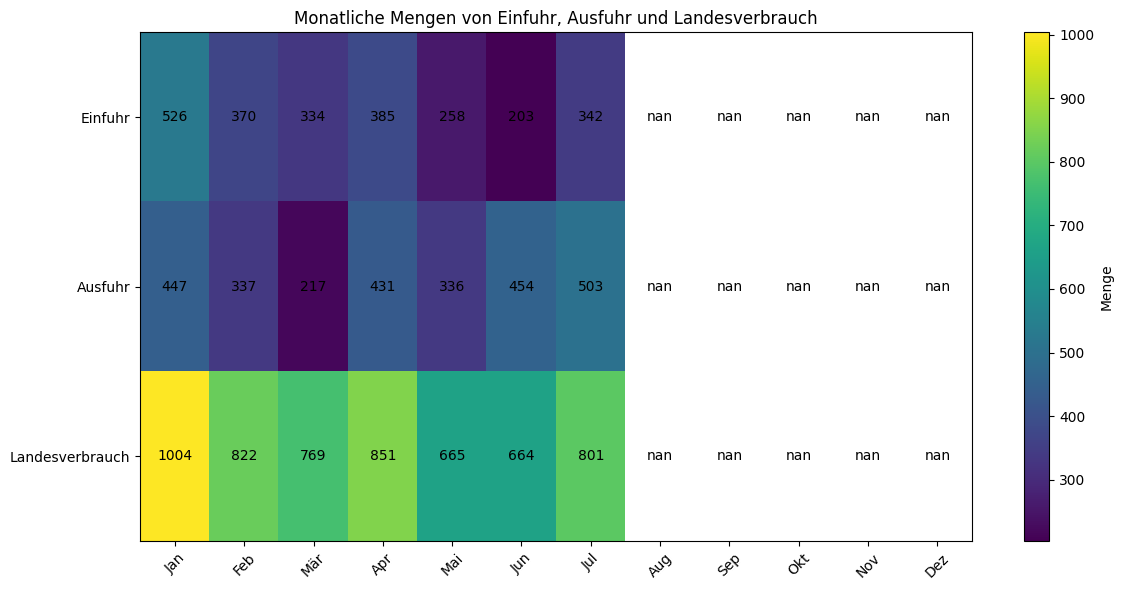

In [28]:
monate = list(month_map.values())
monthly = monthly.set_index("Monat").reindex(monate).reset_index()

categories = ['Einfuhr', 'Ausfuhr', 'Landesverbrauch']
M = monthly[categories].T.to_numpy(dtype=float)

plt.figure(figsize=(12, 6))
plt.imshow(M, aspect='auto', cmap='viridis')
plt.colorbar(label='Menge')
plt.yticks(ticks=range(len(categories)), labels=categories)
plt.xticks(ticks=range(len(monate)), labels=monate, rotation=45)

for i in range (M.shape[0]):
    for j in range(M.shape[1]):
        val = M[i, j]
        plt.text(j, i, f'{val:.0f}', ha='center', va='center', color='white' if val > M.max()/2 else 'black')


plt.title('Monatliche Mengen von Einfuhr, Ausfuhr und Landesverbrauch')
plt.tight_layout()
plt.show()

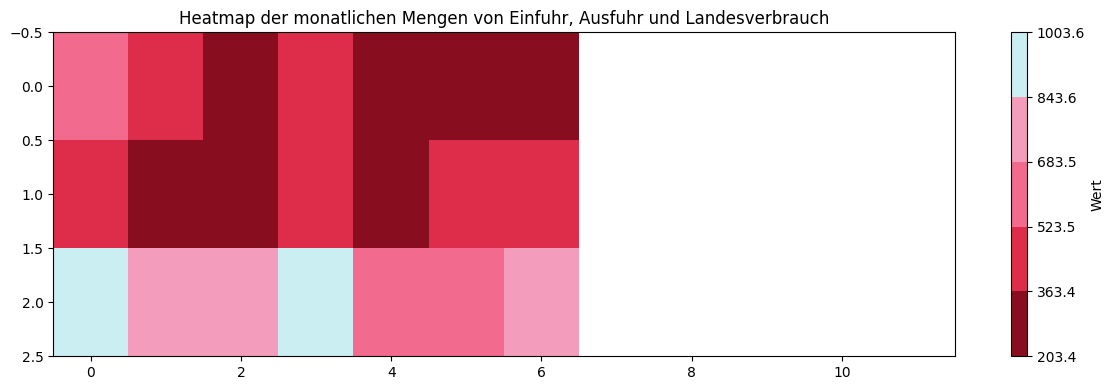

In [29]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

colors = ["#880d1e",
"#dd2d4a",
"#f26a8d",
"#f49cbb",
"#cbeef3"]

cmap = ListedColormap(colors)

vmin = np.nanmin(M)
vmax = np.nanmax(M)
bounds = np.linspace(vmin, vmax, len(colors) + 1)
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12, 4))
im = plt.imshow(M, aspect='auto', cmap=cmap, norm=norm)
cbar = plt.colorbar(im, ticks = bounds, label="Wert")
plt.title("Heatmap der monatlichen Mengen von Einfuhr, Ausfuhr und Landesverbrauch")
plt.tight_layout()
plt.show()




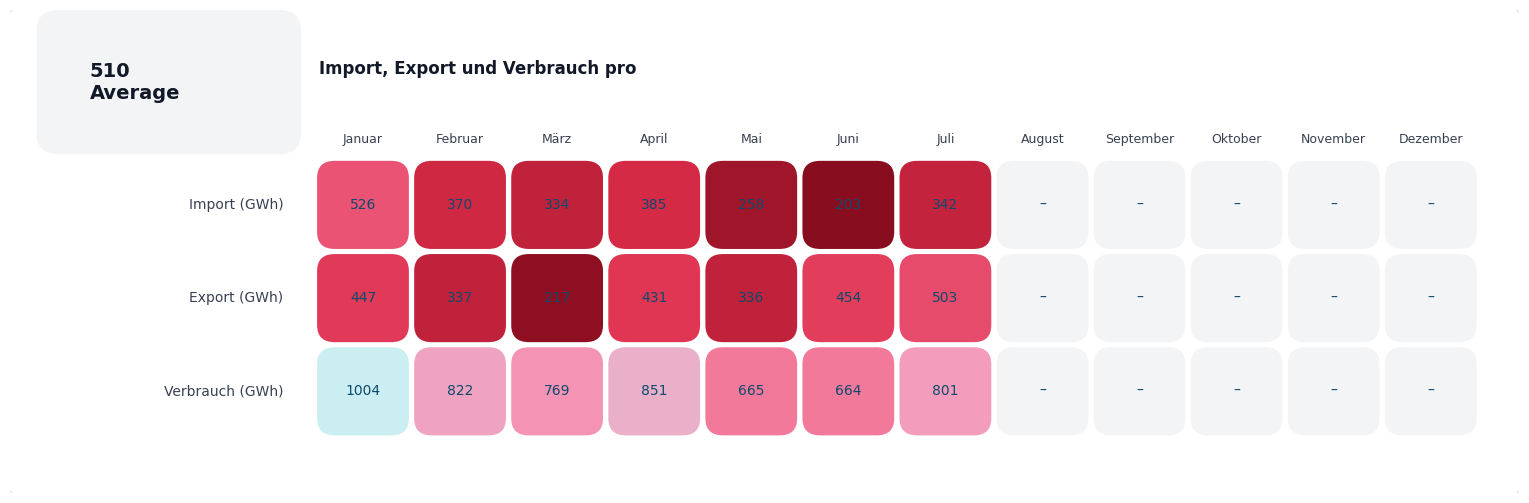

In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import patches


df["Datum"] = pd.to_datetime(df["Datum"], errors="coerce")
for col in ["Einfuhr", "Ausfuhr", "Landesverbrauch"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


month_map = {
    1:"Januar",2:"Februar",3:"März",4:"April",5:"Mai",6:"Juni",
    7:"Juli",8:"August",9:"September",10:"Oktober",11:"November",12:"Dezember"
}
df["Monat"] = df["Datum"].dt.month.map(month_map)

cats = ["Einfuhr","Ausfuhr","Landesverbrauch"]
monate = list(month_map.values())

monthly = (
    df.groupby("Monat")[cats]
      .sum()
      .reindex(monate)
)


M = monthly.reindex(columns=cats).T.to_numpy(dtype=float)


palette_blue = ["#E6F7FF", "#BAECFE", "#8EE2FD", "#63D8FC", "#37CEFB"]

palette_custom = ["#880d1e", "#dd2d4a", "#f26a8d", "#f49cbb", "#cbeef3"]


USE_CUSTOM_PALETTE = True 
palette = palette_custom if USE_CUSTOM_PALETTE else palette_blue


palette = [c if c.startswith("#") else f"#{c}" for c in palette]
cmap = LinearSegmentedColormap.from_list("custom", palette, N=256)


n_rows, n_cols = M.shape  # 3 x 12
tile_size = 1.0           # Kachelgröße
gap = 0.10                # Abstand zwischen Kacheln
corner = 0.20             # Rundung der Ecken
pad_left = 3.5            # Platz links für Labels & "Average"
pad_top = 1.8             # Platz oben für Monatslabels
pad_right = 0.5
pad_bottom = 0.7


W = pad_left + n_cols*(tile_size + gap) - gap + pad_right
H = pad_top + n_rows*(tile_size + gap) - gap + pad_bottom

fig, ax = plt.subplots(figsize=(W*0.9, H*0.9))
ax.set_xlim(0, W)
ax.set_ylim(0, H)
ax.axis("off")


card = patches.FancyBboxPatch(
    (0.15, 0.15), W-0.3, H-0.3,
    boxstyle="round,pad=0.2,rounding_size=0.25",
    linewidth=1.0, edgecolor="#e5e7eb", facecolor="white"
)
ax.add_patch(card)


vmin = np.nanmin(M)
vmax = np.nanmax(M)
norm = Normalize(vmin=vmin, vmax=vmax)


ax.text(pad_left, H - 0.8, "Import, Export und Verbrauch pro",
        ha="left", va="bottom", fontsize=12, fontweight=600, color="#111827")

avg_val = np.nanmean(M)
avg_box = patches.FancyBboxPatch(
    (0.6, H - 1.4), 2.4, 1.1,
    boxstyle="round,pad=0.3,rounding_size=0.25",
    linewidth=0, facecolor="#F3F4F6"
)
ax.add_patch(avg_box)
ax.text(0.9, H - 0.85, f"{avg_val:.0f}\nAverage",
        ha="left", va="center", fontsize=14, fontweight=700, color="#111827")


for j, m in enumerate(monate):
    x = pad_left + j*(tile_size + gap) + tile_size/2
    ax.text(x, H - pad_top + 0.2, m, ha="center", va="bottom", fontsize=9, color="#374151")


row_labels = ["Import (GWh)", "Export (GWh)", "Verbrauch (GWh)"]
for i, label in enumerate(row_labels):
    y = H - pad_top - i*(tile_size + gap) - tile_size/2
    ax.text(pad_left - 0.4, y, label, ha="right", va="center", fontsize=10, color="#374151")


for i in range(n_rows):
    for j in range(n_cols):
        val = M[i, j]
        x = pad_left + j*(tile_size + gap)
        y = H - pad_top - i*(tile_size + gap) - tile_size

        # Farbe
        if np.isnan(val):
            face = "#F3F4F6"  
        else:
            face = cmap(norm(val))

        rect = patches.FancyBboxPatch(
            (x, y), tile_size, tile_size,
            boxstyle=f"round,pad=0.02,rounding_size={corner}",
            linewidth=0, facecolor=face
        )
        ax.add_patch(rect)

       
        txt = "–" if np.isnan(val) else f"{val:.0f}"
        ax.text(x + tile_size/2, y + tile_size/2, txt,
                ha="center", va="center", fontsize=10, color="#0c4a6e")


plt.tight_layout()
plt.show()


In [31]:

import pandas as pd
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, HTML

# Anzeige etwas breiter
display(HTML("<style>.container { width:95% !important; }</style>"))


In [32]:

USE_HTML = False
CSV_PFAD = "cleaned_dataset.csv'"    
XLSX_PFAD = "dataset.xlsx"     
SHEET = 0

df = None

if not USE_HTML:
    try:
        try:
            df = pd.read_csv('cleaned_dataset.csv')
        except Exception:
            df = pd.read_excel(XLSX_PFAD, sheet_name=SHEET)
    except Exception as e:
        print("Konnte CSV/Excel nicht laden:", e)
        print("Bitte USE_HTML=True setzen oder Pfade prüfen.")
        

df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce')
for col in ['Einfuhr', 'Ausfuhr', 'Landesverbrauch']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()


,Datum,Laufwerke,Speicherwerke,Total Hydraulisch,Kernkraftwerke,Thermisch,Windkraft,Photovoltaik,Total Erneuerbar,Verbrauch Speicherpumpen,Nettoerzeugung Total,Einfuhr,Ausfuhr,Überschuss,Landesverbrauch,Mittlere Tagestemperatur,Wasserführung Rhein,Wasserführung in %
0,2025-01-01,26.2,18.3,44.5,71.0,9.9,1.2,6.2,132.8,26.5,106.3,140.8,74.7,66.1,172.4,1.0,672.0,86.0
1,2025-01-08,37.7,67.6,105.3,70.8,10.7,1.6,2.9,191.2,6.0,185.3,116.9,106.6,10.3,195.6,7.0,1572.0,200.0
2,2025-01-15,40.5,107.2,147.7,71.1,12.3,0.7,7.3,239.2,8.1,231.1,79.6,91.0,-11.4,219.7,-0.0,1061.0,135.0
3,2025-01-22,35.9,95.8,131.7,71.0,12.2,1.2,3.6,219.8,3.6,216.2,74.0,72.2,1.7,217.9,1.0,862.0,110.0
4,2025-01-29,36.5,62.4,98.9,71.0,12.4,0.9,13.5,196.8,10.7,186.0,114.3,102.3,12.0,198.0,6.0,1578.0,201.0


In [33]:

month_map = {
    1:'Januar', 2:'Februar', 3:'März', 4:'April', 5:'Mai', 6:'Juni',
    7:'Juli', 8:'August', 9:'September', 10:'Oktober', 11:'November', 12:'Dezember'
}
monate = [month_map[m] for m in range(1,13)]
cats_all = ['Einfuhr','Ausfuhr','Landesverbrauch']

def aggregate_monthly(df_in, year, agg='sum', month_start=1, month_end=12, cats='Alle'):
    d = df_in.copy()
    d = d[d['Datum'].dt.year == year]
    d['MonatNum'] = d['Datum'].dt.month
    if agg == 'sum':
        monthly = d.groupby('MonatNum')[cats_all].sum()
    else:
        monthly = d.groupby('MonatNum')[cats_all].mean()
    # vollen Monatsindex
    monthly = monthly.reindex(range(1,13))
    # Monatsfenster maskieren: außerhalb -> NaN
    mask = ~((monthly.index >= month_start) & (monthly.index <= month_end))
    monthly.loc[mask, :] = np.nan
    # Kategorien filtern
    if cats in cats_all:
        monthly = monthly[[cats]]
    # Reihenfolge Jan–Dez und Achsen drehen (Zeilen=Kategorien, Spalten=Monate)
    monthly.columns.name = None
    monthly.index.name = 'MonatNum'
    monthly = monthly.rename(index=month_map)
    return monthly

# Paletten
palette_blue = ["#E6F7FF", "#BAECFE", "#8EE2FD", "#63D8FC", "#37CEFB"]
palette_custom = ["#880d1e", "#dd2d4a", "#f26a8d", "#f49cbb", "#cbeef3"]
palette_custom_1 = ["#e6fffb", "#b2f5ea", "#7ee7d8", "#38b2ac", "#0d9488"]

def build_colors(palette_name):
    if palette_name == 'Blautöne':
        return palette_blue
    else:
        return [c if c.startswith("#") else f"#{c}" for c in palette_custom]

def plot_heatmap(monthly_df, palette_name):
    values = monthly_df.T  # Zeilen=Kategorien, Spalten=Monate
    colors = build_colors(palette_name)
    fig = px.imshow(
        values,
        color_continuous_scale=colors,
        labels=dict(x="Monat", y="Kategorie", color="Wert"),
        text_auto=True
    )
    fig.update_layout(
        margin=dict(l=40, r=10, t=40, b=40),
        title="Interaktive Heatmap – Import / Export / Verbrauch"
    )
    fig.update_xaxes(title="", tickangle=0)
    fig.update_yaxes(title="")
    fig.update_traces(
        hovertemplate="Monat: %{x}<br>Kategorie: %{y}<br>Wert: %{z:.0f}<extra></extra>",
        texttemplate="%{text:.0f}"
    )
    fig.show()

# Widgets
years = sorted(df['Datum'].dropna().dt.year.unique())
year_dd = widgets.Dropdown(options=years, value=years[0], description='Jahr:', layout=widgets.Layout(width='160px'))
month_range = widgets.IntRangeSlider(value=[1,12], min=1, max=12, step=1, description='Monate:', continuous_update=False)
agg_tb = widgets.ToggleButtons(options=[('Summe','sum'), ('Durchschnitt','mean')], value='sum', description='Aggregation:')
cats_tb = widgets.ToggleButtons(options=['Alle'] + cats_all, value='Alle', description='Kategorien:')

def on_update(change=None):
    year = year_dd.value
    mstart, mend = month_range.value
    agg = agg_tb.value
    cats = cats_tb.value
    monthly = aggregate_monthly(df, year=year, agg=agg, month_start=mstart, month_end=mend, cats=cats)
    plot_heatmap(monthly, palette_dd.value)

ui = widgets.HBox([year_dd, month_range, agg_tb, palette_dd, cats_tb])
display(ui)
out = widgets.interactive_output(on_update, {})
display(out)
on_update()


Output()

In [34]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

#

df_work = df.copy()
df_work["Datum"] = pd.to_datetime(df_work["Datum"], errors="coerce")

SERIES_MAP = {
    "Verbrauch Speicherpumpe": "Verbrauch Speicherpumpen",
    "Import": "Einfuhr",
    "Export": "Ausfuhr",
    "Nettoerzeugung": "Nettoerzeugung Total",
    "Landeserzeugung": "Total Erneuerbar",
}


COLORS = {
    "Verbrauch Speicherpumpe": "#b91c1c",  # dunkles Rot
    "Import": "#ef4444",                    # rot
    "Export": "#f472b6",                    # pink
    "Nettoerzeugung": "#f9a8d4",            # hellpink
    "Landeserzeugung": "#cbeef3",           # hellblau
}

MONTH_NAMES = {
    1:"Jan",2:"Feb",3:"Mär",4:"Apr",5:"Mai",6:"Jun",
    7:"Jul",8:"Aug",9:"Sep",10:"Okt",11:"Nov",12:"Dez"
}

def monthly_agg_for_year(df_in, year:int):
    d = df_in[df_in["Datum"].dt.year == year].copy()
    d["Monat"] = d["Datum"].dt.month
    monthly = (
        d.groupby("Monat")[[SERIES_MAP[s] for s in SERIES_MAP]].sum()
        .reindex(range(1,13))
    )
    monthly.index = [MONTH_NAMES[m] for m in monthly.index]
    monthly.columns = list(SERIES_MAP.keys())  # nutzerfreundliche Namen
    return monthly

def stacked_area(monthly_df: pd.DataFrame, title:str):
    order = ["Verbrauch Speicherpumpe", "Import", "Export", "Nettoerzeugung", "Landeserzeugung"]

    x = monthly_df.index.tolist()
    fig = go.Figure()

    for k, name in enumerate(order):
        y = monthly_df[name].to_list()
        fig.add_trace(go.Scatter(
            x=x, y=y, mode="lines+markers+text",
            text=[f"{v:.0f}" if pd.notna(v) else "" for v in y],
            textposition="top center",
            line=dict(color=COLORS[name], width=2),
            marker=dict(size=4, color=COLORS[name]),
            name=name,
            stackgroup="one", 
            groupnorm="",       
            hovertemplate=f"{name}<br>%{{x}}: %{{y:.0f}}<extra></extra>"
        ))

    fig.update_layout(
        title=title,
        legend=dict(orientation="h", yanchor="bottom", y=-0.25, xanchor="left", x=0),
        margin=dict(l=40, r=20, t=50, b=70),
        plot_bgcolor="white",
        xaxis=dict(
            title="", showgrid=True, gridcolor="#e5e7eb", zeroline=False
        ),
        yaxis=dict(
            title="", showgrid=True, gridcolor="#e5e7eb", zeroline=False
        ),
        hovermode="x unified"
    )
    return fig

years = sorted(df_work["Datum"].dropna().dt.year.unique())
year_dd = widgets.Dropdown(options=years, value=years[0], description="Year", layout=widgets.Layout(width="160px"))

out = widgets.Output()

def render(_=None):
    with out:
        out.clear_output()
        y = year_dd.value
        monthly = monthly_agg_for_year(df_work, y)
        fig = stacked_area(monthly, title="Zeitverlauf- und Energieflussgrössen")
        display(fig)

year_dd.observe(render, names="value")
display(widgets.HBox([year_dd]))
render()
display(out)


Output()